# TP4

Se quiere utilizar el conjunto de datos guardado en el archivo AirQualityUCI.csv para realizar un análisis de regresión. El algoritmo que se quiere utilizar requiere que los valores numéricos se encuentren en un rango entre 0 y 1. 

- Seleccionar un método de escalado y aplicarlo
- Justificar la elección

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Leer csv
df = pd.read_csv('../data/AirQualityUCI.csv')

df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
480,30/03/2004,18.00.00,2,2,1236,272,9,6,962,117,853,101,1532,928,15,8,40.0,4.0,0.0,7228.0
4373,08/09/2004,23.00.00,2,1100,-200,10,6,999,251,984,131,1361,1145,25,4,30,5.0,0.0,9722.0,NaN
3541,05/08/2004,07.00.00,-200,1261,-200,14,5,1134,-200,557,-200,2015,1388,24,3,58,0.0,1.0,7429.0,NaN
4073,27/08/2004,11.00.00,1,8,-200,-200,-200,0,-200,119,-200,101,-200,-200,-200,-200,-200.0,NaN,NaN,NaN
1431,09/05/2004,09.00.00,-200,947,-200,4,8,752,-200,1068,-200,1434,620,17,9,44,8.0,0.0,9104.0,NaN


In [6]:
columns_names = ['CO(GT)', 'PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19']
# Crear copia con las columnas seleccionadas
df_cols = df[columns_names].copy(deep = True)
# Crear lista con colores
color = []
names = ['CO(GT)', 'PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19']
df_col_melt = df_cols.melt() 
for i in range(len(df_col_melt)):
    if df_col_melt["variable"][i] == 'CO(GT)':
        x_color = "blue"
    if df_col_melt["variable"][i] == 'PT08.S1(CO)':
        x_color = "orange"
    if df_col_melt["variable"][i] == 'NMHC(GT)':
        x_color = "yellow"
    if df_col_melt["variable"][i] == 'C6H6':
        x_color = "red"
    if df_col_melt["variable"][i] == 'PT08.S2(CO)':
        x_color = "brown"
    if df_col_melt["variable"][i] == 'NOx(GT)':
        x_color = "#6f91d1"
    if df_col_melt["variable"][i] == 'PT08.S3(NOx)':
        x_color = "pink"
    if df_col_melt["variable"][i] == 'N02(GT)':
        x_color = "#4C243B"
    if df_col_melt["variable"][i] == 'PT08.S4(NO2)':
        x_color = "#38369A"
    if df_col_melt["variable"][i] == 'PT08.S5(O3)':
        x_color = "#5C0029"
    if df_col_melt["variable"][i] == 'T':
        x_color = "#0D1B1E"
    if df_col_melt["variable"][i] == 'RH':
        x_color = "#6aa87b"
    if df_col_melt["variable"][i] == 'AH':
        x_color = "#45965b"
    if df_col_melt["variable"][i] == 'Unnamed: 15':
        x_color = "#1c4ac9"
    if df_col_melt["variable"][i] == 'Unnamed: 16':
        x_color = "#30358a"
    if df_col_melt["variable"][i] == 'Unnamed: 17':
        x_color = "#dec81f"
    if df_col_melt["variable"][i] == 'Unnamed: 18':
        x_color = "#53db9c"
    if df_col_melt["variable"][i] == 'Unnamed: 19':
        x_color = "#3266c7"
                   
    color.append(x_color)

<AxesSubplot: xlabel='variable', ylabel='value'>

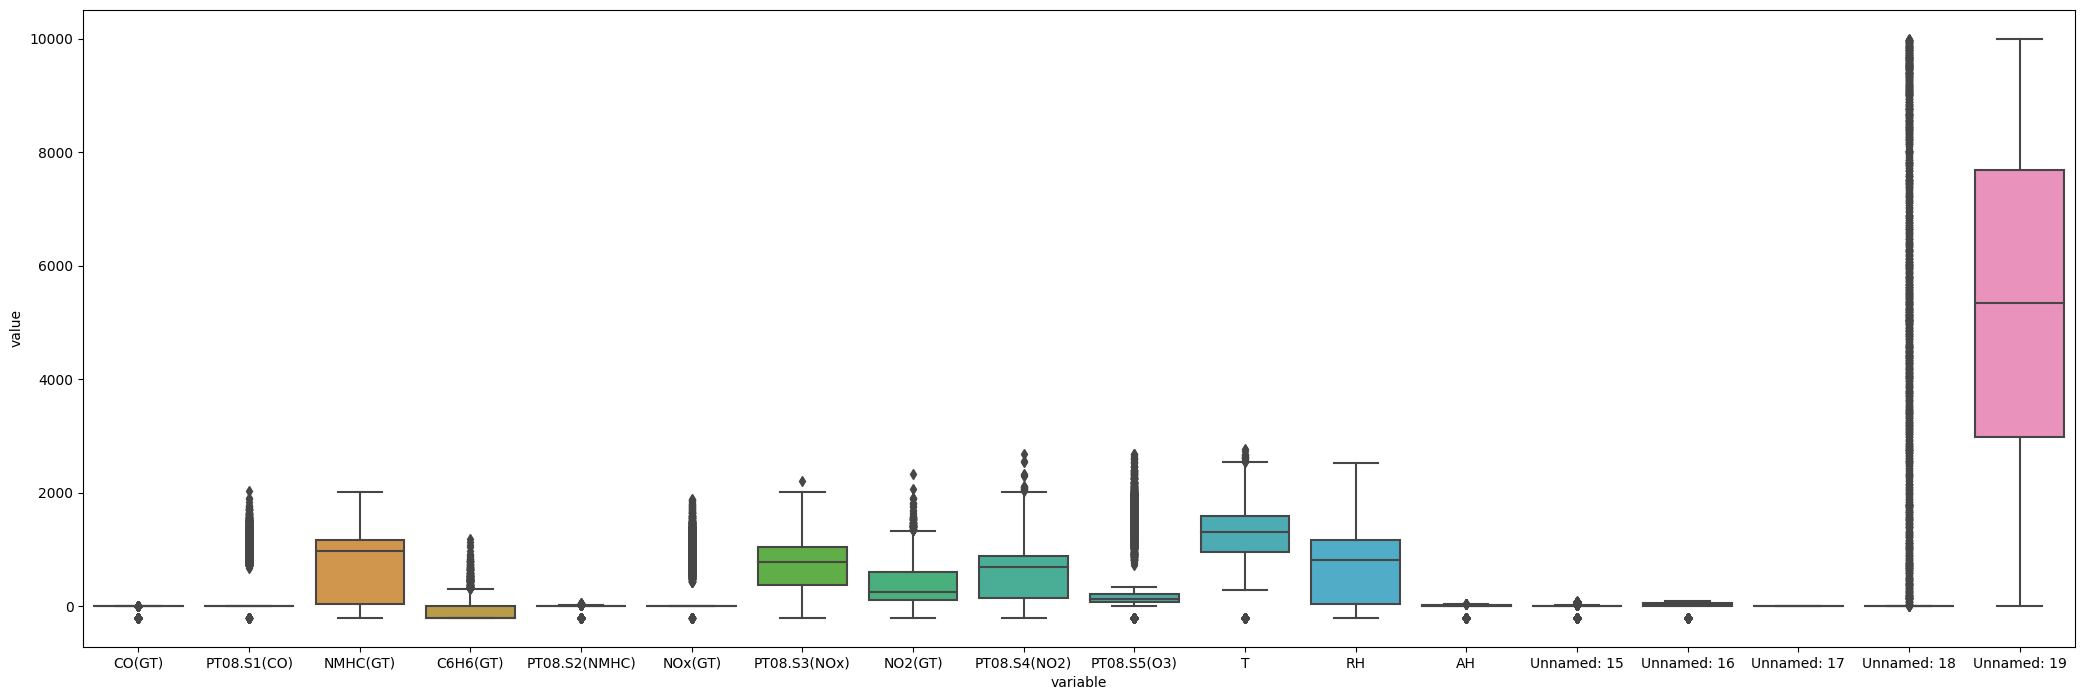

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.boxplot(x='variable',y='value',data = df_cols.melt(), ax=ax)

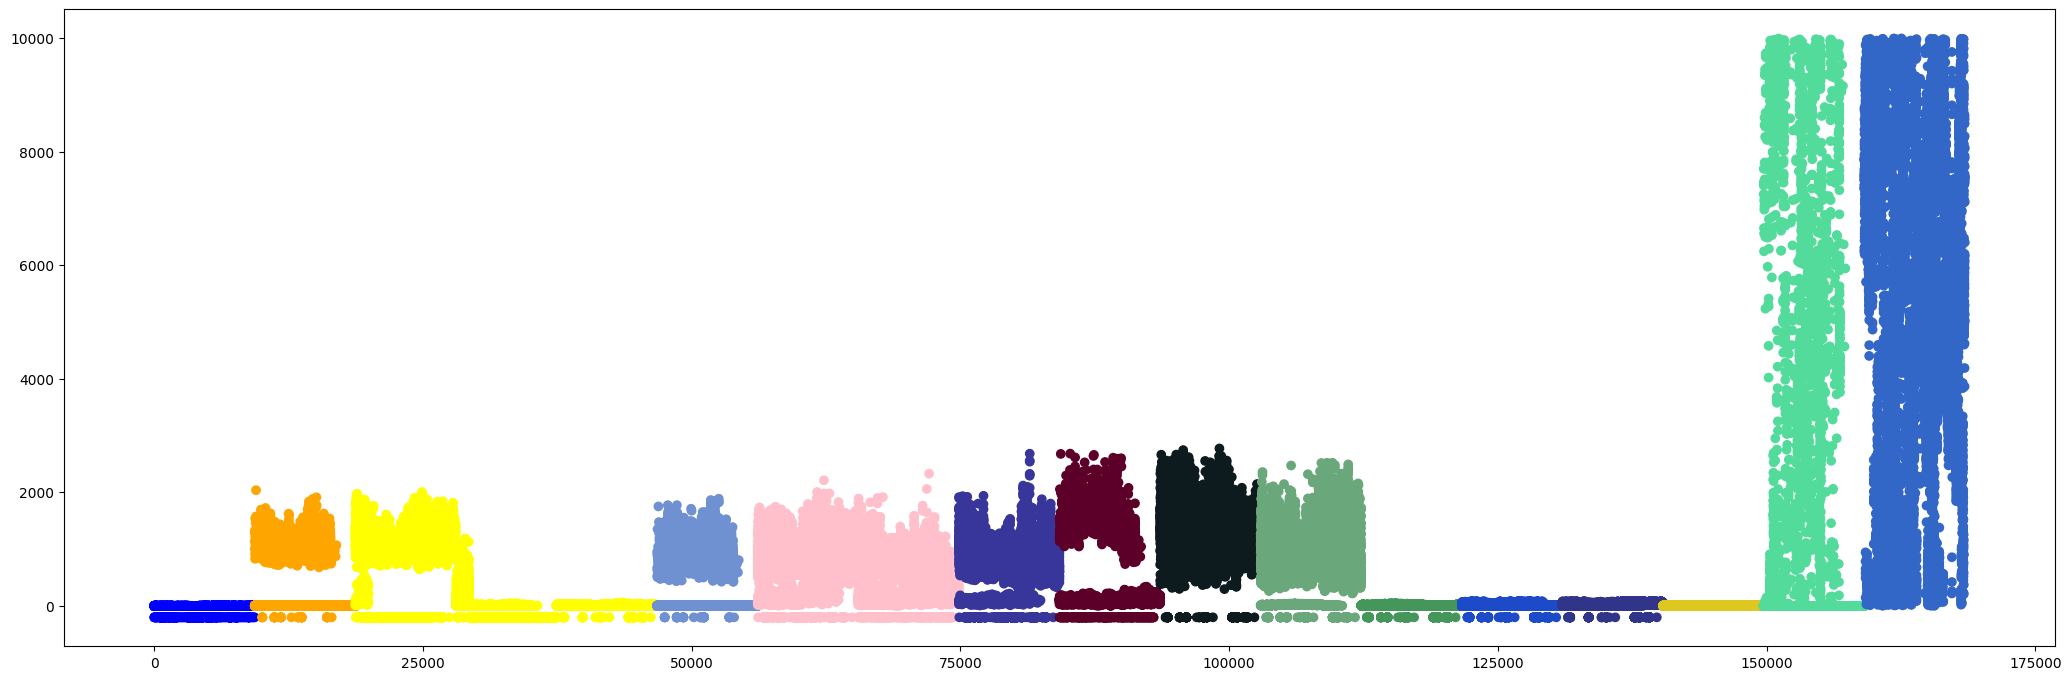

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
plt.scatter(df_cols.melt().index,df_cols.melt()["value"], c=color)
plt.show()

<AxesSubplot: xlabel='variable', ylabel='value'>

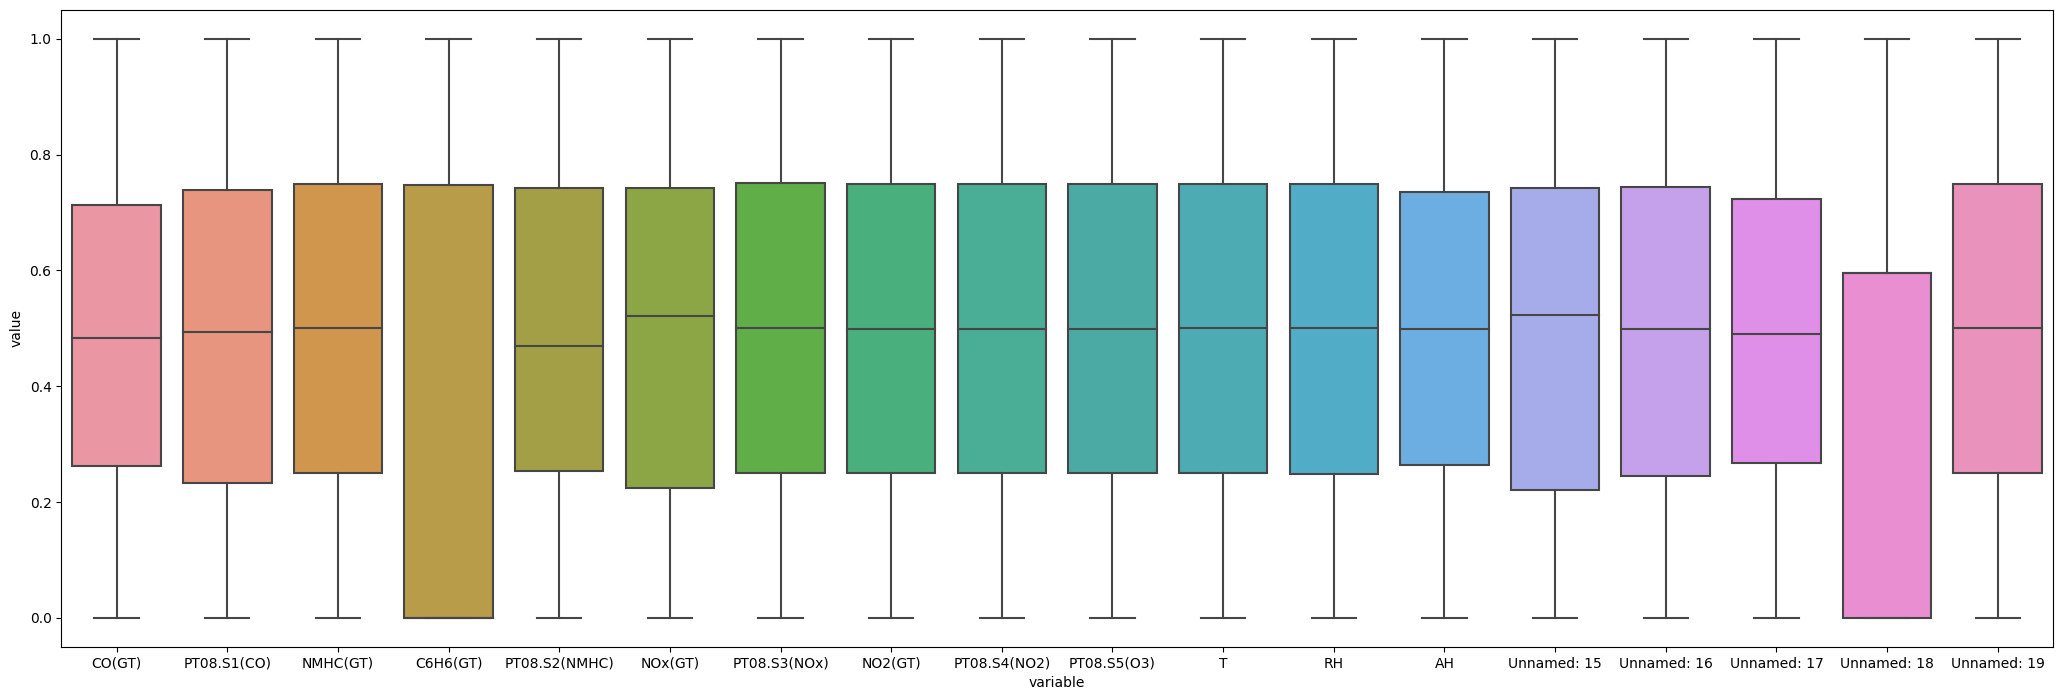

In [10]:
from sklearn.preprocessing import QuantileTransformer

scaler_tq = QuantileTransformer()
df_cols_tq = pd.DataFrame(scaler_tq.fit_transform(df_cols), columns = df_cols.columns)

fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.boxplot(x='variable',y='value',data = df_cols_tq.melt())

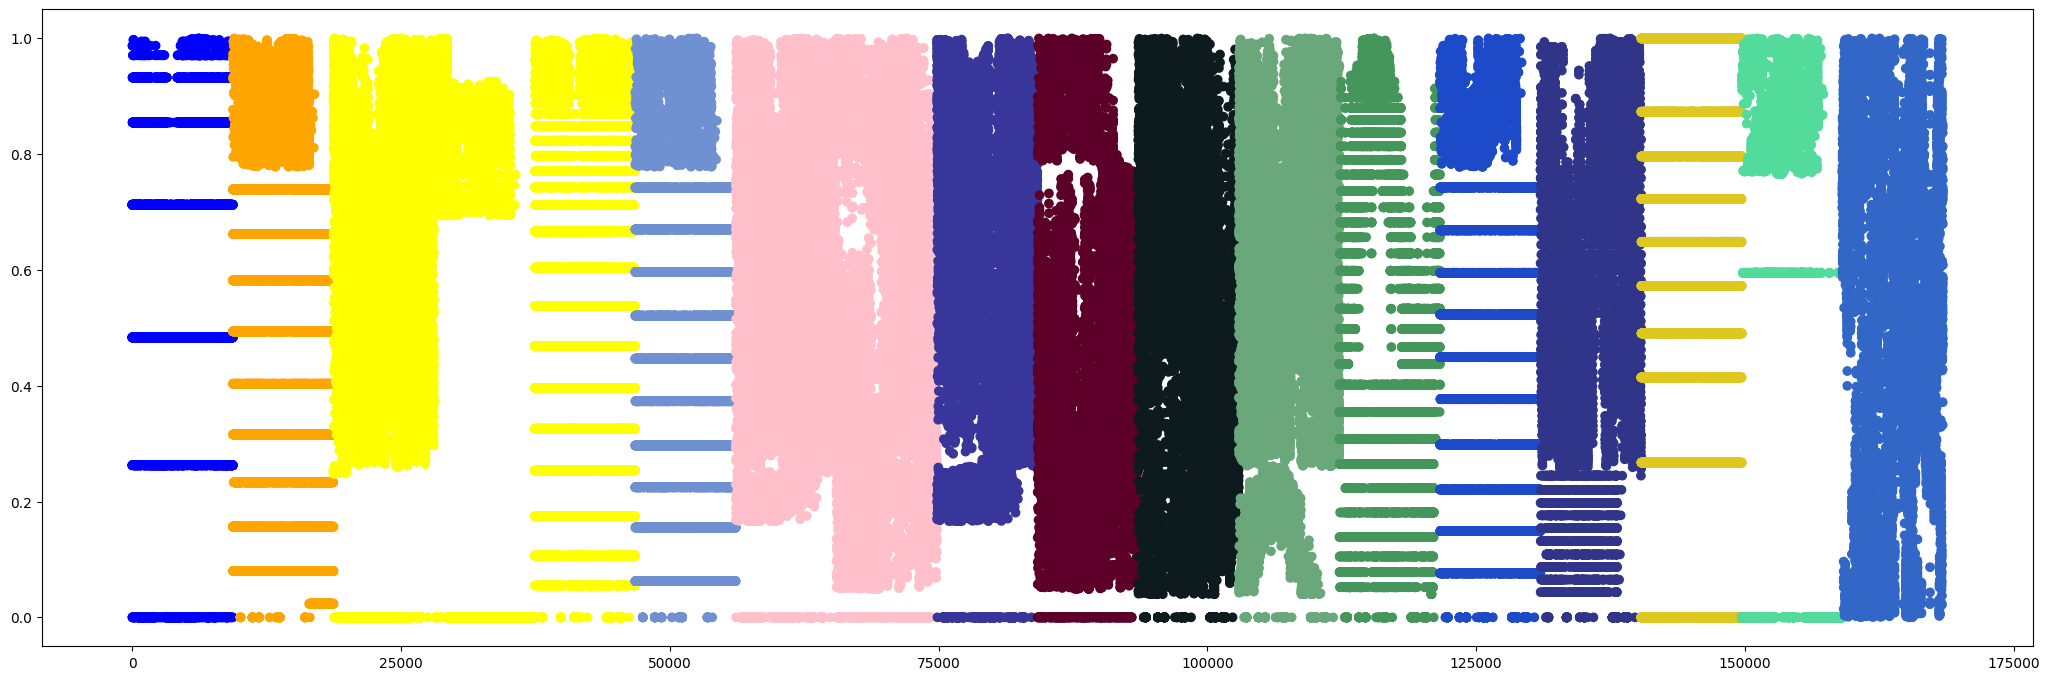

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
plt.scatter(df_cols_tq.melt().index,df_cols_tq.melt()["value"], c=color)
plt.show()

<AxesSubplot: xlabel='variable', ylabel='value'>

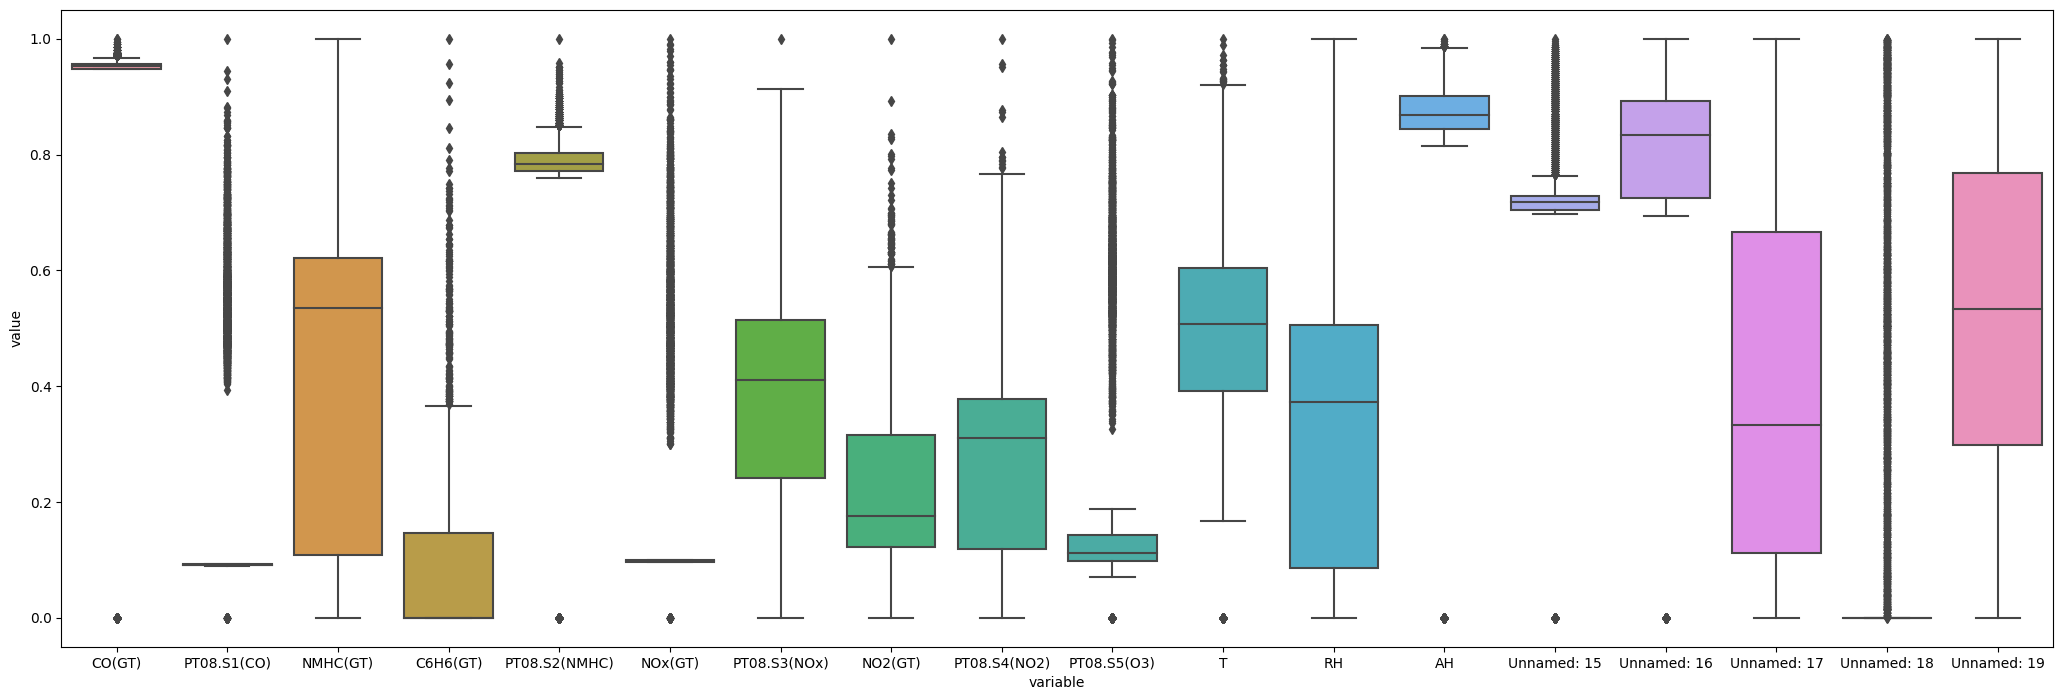

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_cols_maxmin = pd.DataFrame(scaler_minmax.fit_transform(df_cols), columns = df_cols.columns)
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.boxplot(x='variable',y='value',data = df_cols_maxmin.melt())

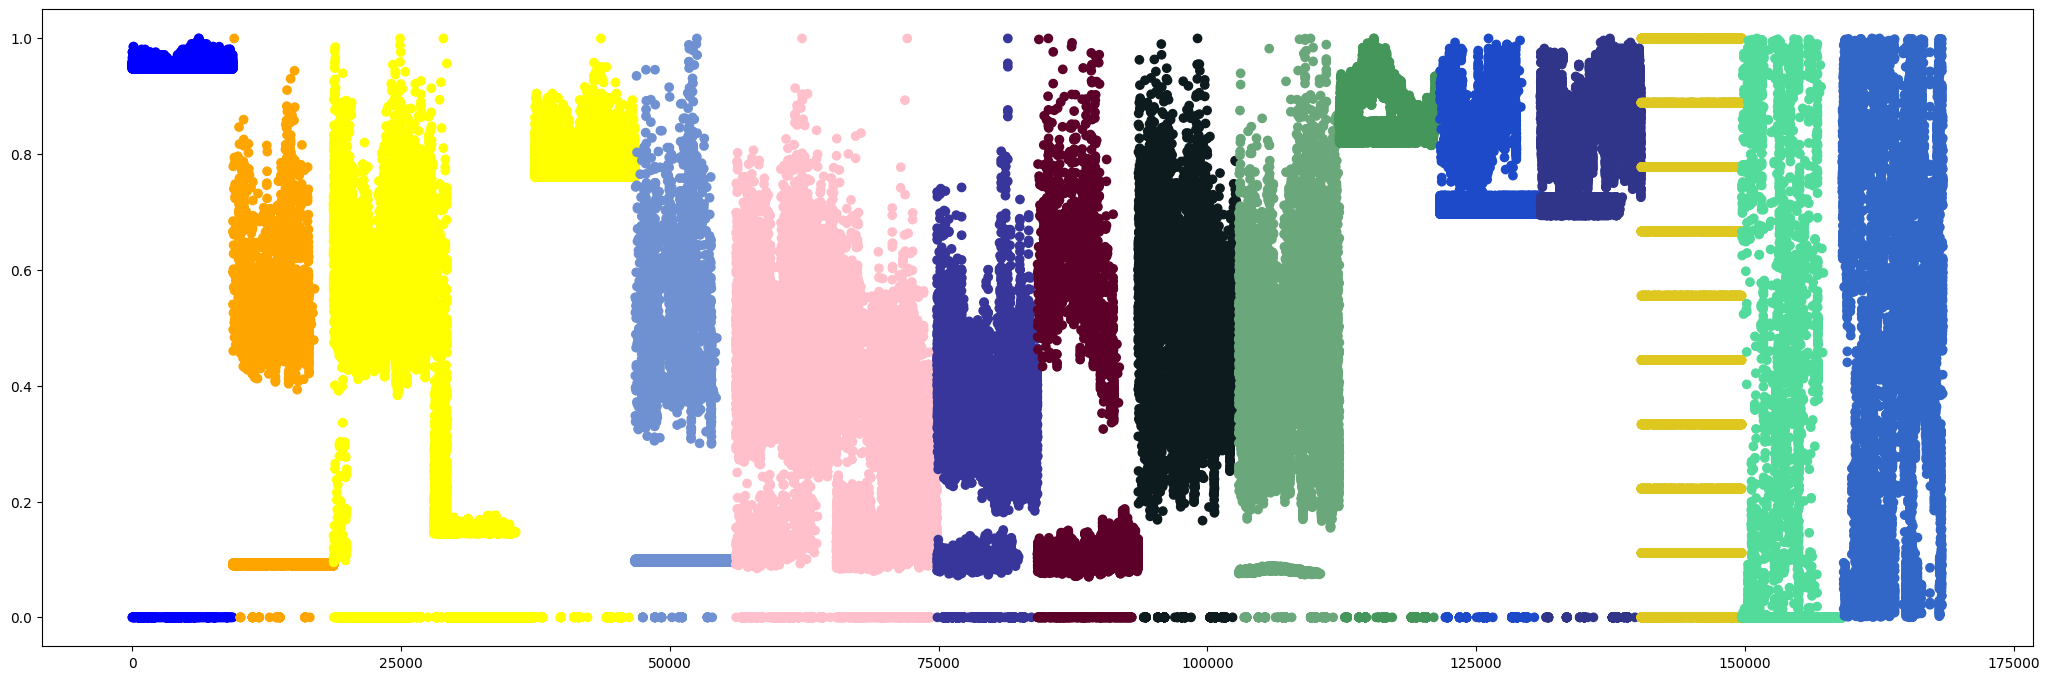

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
plt.scatter(df_cols_maxmin.melt().index,df_cols_maxmin.melt()["value"], c=color)
plt.show()

> **Nota:** El metodo elegido es Max - Min, ya que los datos que no son maximos ni minimos mantienen una tendencia.(Se alteran justamente los valores extremos como maximos y minimos). Con el metodo Estandarizacion de cuartiles se deforman los valores que no presentan distribucion normal.